# 7. 통계 분석 및 머신러닝 패키지

## 01장. StatsModels 패키지 소개

- - -

## 1. Statsmodels 패키지 소개


StatsModels는 기초 통계, 회귀 분석, 시계열 분석 등 다양한 통계 분석 기능을 제공하는 파이썬 패키지다.


- 복잡한 시계열 분석은 StatsModels만 제공
- matplotlib의 pylab처럼 쉽게 사용할 수 있도록 도와주는 API 존재한다


    - import matplotlib.pylab as plt
    - import statsmodels.api as sm
    
    
- 책을 기반으로 모든 통계의 기본을 구현하려고 하는 패키지, 아직 다 구현 되지 않아서 계속 개발되고 있다.


- R에서 제공하던 명령어 뿐만 아니라 Rdatasets 이라는 프로젝트를 통해 R에서 사용하던 1000개 이상의 표준 데이터셋도 동일하게 제공하기 위해 노력하고 있음


    - R에 사용하는 패키지들 그대로 파이썬으로 사용 가능 하도록 하는 철학 가지고 있어서, R과 명령어들이 비슷

    - R 데이터 가지고 오는데 모두 가지고 오기 힘드니까 load 해서 import 하는 형태로 구성

    - 데이터 doc에 적혀있는 샘플 코드들 R코드라서 그대로 사용하면 안됨

    - 시계열 분석시 Statsmodels 패키지 데이터 많이 사용
    
    - Rdatasets 프로젝트 : R 데이터 파이썬에서 제공하기 위한 프로젝트https://github.com/vincentarelbundock/Rdatasets
    
    - 데이터 셋 목록 : http://vincentarelbundock.github.io/Rdatasets/datasets.html

In [1]:
## How to import statsmodels

# statsmodel package 안에 api subpackage를 임포트 한다.

import statsmodels.api as sm # (대부분 이거 사용할 것)
# import statsmodels.formula.api as smf
# import statsmodels.stats.api as sms

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


- 기초 통계 (Statistics)


    - 각종 검정(test) 기능
    - 커널 밀도 추정
    - Generalized Method of Moments
    - 회귀 분석 (Linear Regression)
    

- 선형 모형 (Linear Model)


    - 일반화 선형 모형 (Generalized Linear Model)
    - 강인 선형 모형 (Robust Linear Model)
    - 선형 혼합 효과 모형 (Linear Mixed Effects Model)
    - ANOVA (Analysis of Variance)
    - Discrete Dependent Variable (Logistic Regression 포함)
    

- 시계열 분석 (Time Series Analysis)


    - ARMA/ARIMA Process
    - Vector ARMA Process


## 2. Statsmodels의 샘플데이터

- - -

#### 예1_타이타닉 생존자

`sm.datasets.get_rdataset(item, package="datasets")` : Statsmodels의 서브패키지인 datasets 안의 표준 데이터셋 가져오기
    - item : 데이터 이름
    - datasets : 패키지 이름, dataset인 경우 생략 가능
    
- 받은 데이터는 2가지 속성을 가지고 있음


    - data : 데이터 담고 있는 데이터 프레임
    - __doc__ : 데이터에 대한 설명 문자열, R패키지에서 그대로 가지고 온거라 샘플 코드 R로 이루어져 있음

In [15]:
# 데이터 불러보기
data = sm.datasets.get_rdataset("Titanic", package="datasets")

In [16]:
titanic = data.data #.data

In [17]:
titanic.tail()

,Class,Sex,Age,Survived,Freq
27,Crew,Male,Adult,Yes,192
28,1st,Female,Adult,Yes,140
29,2nd,Female,Adult,Yes,80
30,3rd,Female,Adult,Yes,76
31,Crew,Female,Adult,Yes,20


In [19]:
print(data.__doc__) #.__doc__

+---------+-----------------+
| Titanic | R Documentation |
+---------+-----------------+

Survival of passengers on the Titanic
-------------------------------------

Description
~~~~~~~~~~~

This data set provides information on the fate of passengers on the
fatal maiden voyage of the ocean liner ‘Titanic’, summarized according
to economic status (class), sex, age and survival.

Usage
~~~~~

::

    Titanic

Format
~~~~~~

A 4-dimensional array resulting from cross-tabulating 2201 observations
on 4 variables. The variables and their levels are as follows:

+----+----------+---------------------+
| No | Name     | Levels              |
+----+----------+---------------------+
| 1  | Class    | 1st, 2nd, 3rd, Crew |
+----+----------+---------------------+
| 2  | Sex      | Male, Female        |
+----+----------+---------------------+
| 3  | Age      | Child, Adult        |
+----+----------+---------------------+
| 4  | Survived | No, Yes             |
+----+----------+------------------

- - -
#### 예2_미국 강수량


In [22]:
data = sm.datasets.get_rdataset("precip") 
df = data.data
df.tail()

,dat
65,17.4
66,40.8
67,29.1
68,14.6
69,59.2


In [24]:
print(df.__doc__)

 Two-dimensional size-mutable, potentially heterogeneous tabular data
    structure with labeled axes (rows and columns). Arithmetic operations
    align on both row and column labels. Can be thought of as a dict-like
    container for Series objects. The primary pandas data structure

    Parameters
    ----------
    data : numpy ndarray (structured or homogeneous), dict, or DataFrame
        Dict can contain Series, arrays, constants, or list-like objects
    index : Index or array-like
        Index to use for resulting frame. Will default to np.arange(n) if
        no indexing information part of input data and no index provided
    columns : Index or array-like
        Column labels to use for resulting frame. Will default to
        np.arange(n) if no column labels are provided
    dtype : dtype, default None
        Data type to force. Only a single dtype is allowed. If None, infer
    copy : boolean, default False
        Copy data from inputs. Only affects DataFrame / 2d ndar

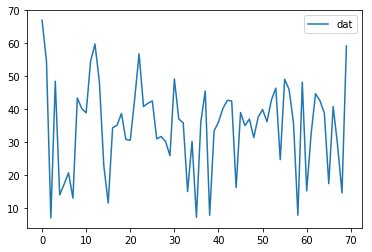

In [27]:
import matplotlib.pylab as plt
df.plot()
plt.show()

이런 값의 경우 예측이 어렵다.

- - -
#### 예3_황체 형성 호르몬 수치 시계열


In [31]:
data = sm.datasets.get_rdataset("lh")
df = data.data
df.tail()

,time,value
43,44,2.6
44,45,2.1
45,46,3.4
46,47,3.0
47,48,2.9


In [33]:
print(df.__doc__)

 Two-dimensional size-mutable, potentially heterogeneous tabular data
    structure with labeled axes (rows and columns). Arithmetic operations
    align on both row and column labels. Can be thought of as a dict-like
    container for Series objects. The primary pandas data structure

    Parameters
    ----------
    data : numpy ndarray (structured or homogeneous), dict, or DataFrame
        Dict can contain Series, arrays, constants, or list-like objects
    index : Index or array-like
        Index to use for resulting frame. Will default to np.arange(n) if
        no indexing information part of input data and no index provided
    columns : Index or array-like
        Column labels to use for resulting frame. Will default to
        np.arange(n) if no column labels are provided
    dtype : dtype, default None
        Data type to force. Only a single dtype is allowed. If None, infer
    copy : boolean, default False
        Copy data from inputs. Only affects DataFrame / 2d ndar

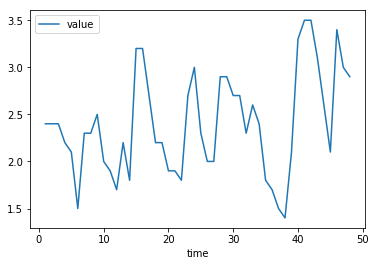

In [36]:
df.plot(x="time", y="value")
plt.show()

그래프가 조금 느리게 움직여서 위, 아래에 머물러 있는 시간이 비교적 길다. 그래서 예측 가능하고 자기가 있는 근처 값이 예측 된다.

- - -
#### 예4_호흡기질환 사망자 수

In [38]:
data = sm.datasets.get_rdataset("deaths","MASS")
df = data.data
df.tail()

,time,value
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


In [39]:
print(df.__doc__)

 Two-dimensional size-mutable, potentially heterogeneous tabular data
    structure with labeled axes (rows and columns). Arithmetic operations
    align on both row and column labels. Can be thought of as a dict-like
    container for Series objects. The primary pandas data structure

    Parameters
    ----------
    data : numpy ndarray (structured or homogeneous), dict, or DataFrame
        Dict can contain Series, arrays, constants, or list-like objects
    index : Index or array-like
        Index to use for resulting frame. Will default to np.arange(n) if
        no indexing information part of input data and no index provided
    columns : Index or array-like
        Column labels to use for resulting frame. Will default to
        np.arange(n) if no column labels are provided
    dtype : dtype, default None
        Data type to force. Only a single dtype is allowed. If None, infer
    copy : boolean, default False
        Copy data from inputs. Only affects DataFrame / 2d ndar

이 시계열 데이터에서는 시간이 1년을 1.0으로, 1개월을 1/12로 하는 값(year-fraciton)으로 인코딩되어 있다. 이 값을 파이썬의 datatime 포맷으로 바꾸려면 다음과 같은 함수를 사용해야 한다.

In [40]:
def yearfraction2datetime(yearfraction, startyear=0):
    import datetime, dateutil
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

In [42]:
# 데이터에 함수 입히는 방법
# df.컬럼이름.map(함수)

# df["datetime"]= df.time을 .map한다(함수)

In [41]:
df["datetime"] = df.time.map(yearfraction2datetime)
df.tail()

,time,value,datetime
67,1979.583333,1354,1979-08-01
68,1979.666667,1333,1979-09-01
69,1979.750000,1492,1979-10-01
70,1979.833333,1781,1979-11-01
71,1979.916667,1915,1979-12-01


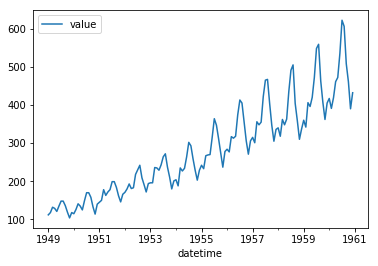

In [49]:
df.plot(x="datetime",y="value")
plt.show()

예측이 잘 된다. 계절적 요인을 가지고 있다.

- - -
#### 예5_항공 운송 인원

In [44]:
data = sm.datasets.get_rdataset("AirPassengers")
df = data.data
df.tail()

,time,value
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


In [45]:
print(df.__doc__)

 Two-dimensional size-mutable, potentially heterogeneous tabular data
    structure with labeled axes (rows and columns). Arithmetic operations
    align on both row and column labels. Can be thought of as a dict-like
    container for Series objects. The primary pandas data structure

    Parameters
    ----------
    data : numpy ndarray (structured or homogeneous), dict, or DataFrame
        Dict can contain Series, arrays, constants, or list-like objects
    index : Index or array-like
        Index to use for resulting frame. Will default to np.arange(n) if
        no indexing information part of input data and no index provided
    columns : Index or array-like
        Column labels to use for resulting frame. Will default to
        np.arange(n) if no column labels are provided
    dtype : dtype, default None
        Data type to force. Only a single dtype is allowed. If None, infer
    copy : boolean, default False
        Copy data from inputs. Only affects DataFrame / 2d ndar

여기도 마찬가지로 시간을 바꾸어준다.

In [46]:
df["datetime"]= df.time.map(yearfraction2datetime)
df.tail()

,time,value,datetime
139,1960.583333,606,1960-08-01
140,1960.666667,508,1960-09-01
141,1960.750000,461,1960-10-01
142,1960.833333,390,1960-11-01
143,1960.916667,432,1960-12-01


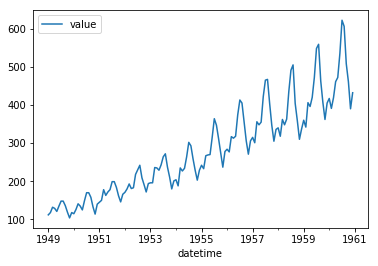

In [50]:
df.plot(x="datetime",y="value")
plt.show()

예측이 잘 된다. 예측이 잘 되냐 안되는 문제이냐에 따라 데이터 예측 가능성이 정해진다.
문제 자체의 예측 가능성이 중요!